In [ ]:
cd /Users/akshitasingh/Downloads/273A_ML/1_MLProject

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(0)

from collections import defaultdict

np.random.seed(100)

In [7]:
# sklearn imports
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# other stats/math imports
import math
from scipy.stats import chi2_contingency

In [8]:
train_data = pd.read_csv("/Users/akshitasingh/Downloads/273A_ML/1_MLProject/dataset_diabetes/train_data.csv", delimiter=None) 
test_data = pd.read_csv("/Users/akshitasingh/Downloads/273A_ML/1_MLProject/dataset_diabetes/test_data.csv", delimiter=None) 

train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

train_data = train_data.drop(['Unnamed: 0'], axis = 1)
test_data = test_data.drop(['Unnamed: 0'], axis = 1)

Xtr = train_data.iloc[:, :-1]
Ytr = train_data.iloc[:, -1]

Xte = test_data.iloc[:, :-1]
Yte = test_data.iloc[:, -1]

# Training SVMs

In [9]:
svmLinear = svm.SVC(kernel='linear', random_state=100)
svmRBF = svm.SVC(kernel='rbf', random_state=100)
svmPoly = svm.SVC(kernel='poly', random_state=100)

In [6]:
# Linear SVM model
cv_svmLinear = cross_val_score(svmLinear, Xtr, Ytr, cv=5)
# Radial Basis Function SVM model
cv_svmRBF = cross_val_score(svmRBF, Xtr, Ytr, cv=5)
# Polynomial SVM model
cv_svmPoly = cross_val_score(svmPoly, Xtr, Ytr, cv=5)

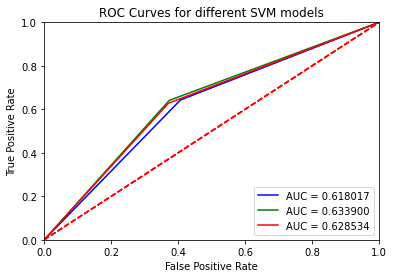

In [7]:
# Plotting ROCs for different SVMs

SVMModel = [svmLinear, svmRBF, svmPoly]
color = ['b', 'g', 'r']

for i, model in enumerate(SVMModel):
    clf = model.fit(Xtr, Ytr)
    YteH = clf.predict(Xte)
    fpr, tpr, threshold = metrics.roc_curve(Yte, YteH)
    roc_auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, color[i] , label = 'AUC = %0.6f' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC Curves for different SVM models')
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

plt.show()

In [8]:
# metrics.plot_roc_curve(svmLinear.fit(XtrUs, YtrUs), Xte, Yte) 

### SVM Pipeline, Grid

In [ ]:
svc = svm.SVC()
scoring = ['balanced_accuracy', 'accuracy', 'roc_auc', 'recall', 'precision']

# c = np.logspace(0, 2, 2)
c = [1,10]
# gamma = [1,0.1,0.01,0.001]
gamma = [ 0.1,.01]
kernel = ['rbf', 'poly', 'sigmoid']
scoring = ['recall', 'accuracy']

param_grid = {'C': c, 'gamma': gamma, 'kernel': kernel}

grid = GridSearchCV(svc,param_grid,refit=False, cv = 2, verbose=2)
chosen_model = grid.fit(Xtr,Ytr)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  55.4s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  53.5s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=  32.5s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=  33.5s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=  20.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=  19.4s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  56.3s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  50.9s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=  22.8s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=  23.0s


In [ ]:
print(grid.best_params_)

In [ ]:
# grid_YteH = grid.predict(Xte)
print(confusion_matrix(Yte, grid_YteH))
print(classification_report(Yte, grid_YteH))

/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


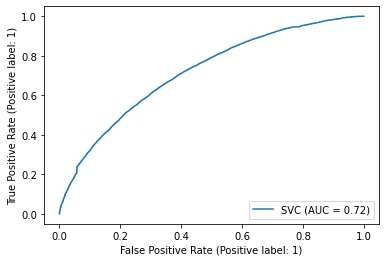

In [10]:
svmRBF = svm.SVC(kernel='rbf', gamma = .01, C = 10, random_state=100)
metrics.plot_roc_curve(svmRBF.fit(Xtr, Ytr), Xtr, Ytr) 

/Users/akshitasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


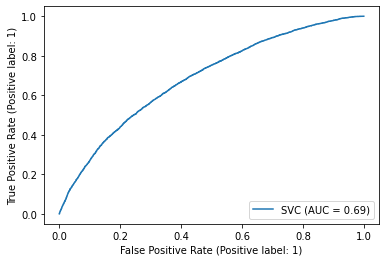

In [11]:
metrics.plot_roc_curve(svmRBF.fit(Xtr, Ytr), Xte, Yte) 

In [13]:
YteH = svmRBF.predict(Xte)

In [30]:
accuracy_score(YteH, Yte)

0.636494989512934

In [31]:
cross_val_score(svmRBF, Xtr, Ytr, cv = 4)

array([0.63742495, 0.64092728, 0.62902419, 0.64136781])

In [14]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Yte, YteH)

In [15]:
precision_recall_curve(Yte, YteH)

(array([0.24017711, 0.35537822, 1.        ]),
 array([1.        , 0.63089462, 0.        ]),
 array([0, 1]))

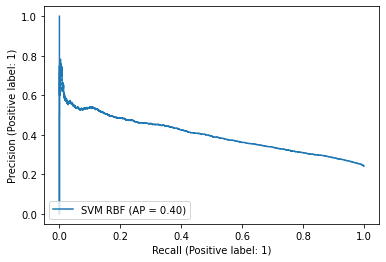

In [17]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    svmRBF, Xte, Yte, name="SVM RBF"
)

Text(0.5, 0, 'False Positive Rate')

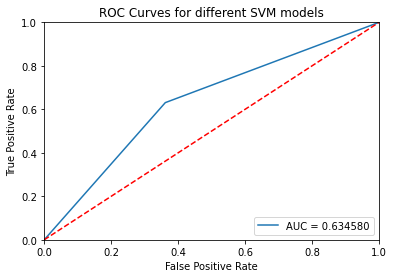

In [29]:
fpr, tpr, threshold = metrics.roc_curve(Yte, YteH)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr , label = 'AUC = %0.6f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC Curve - SVM RBF')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')